#                  Let's Grow More - Data Science Intern

### Name - Omkar Chavan

# 

## Task - 2 : Stock Market Prediction And Forecasting Using Stacked LSTM

### Dataset :- https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing dataset

In [2]:
stock = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df = stock.copy()

In [5]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


# Understanding the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [12]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [13]:
df.value_counts()

Date        Open    High    Low     Last    Close   Total Trade Quantity  Turnover (Lacs)
2010-07-21  122.10  123.00  121.05  121.10  121.55  658666                803.56             1
2015-12-29  144.40  144.40  141.20  141.90  141.90  1260484               1794.94            1
2016-01-15  135.00  135.40  127.50  127.65  128.50  1756768               2297.61            1
2016-01-14  132.10  136.25  131.15  133.90  134.05  1431102               1916.53            1
2016-01-13  141.75  141.95  130.30  135.40  135.60  1907971               2586.28            1
                                                                                            ..
2013-03-26  123.10  125.10  122.00  123.40  123.50  1828953               2259.63            1
2013-03-25  127.30  129.25  122.80  123.75  123.55  3225051               4082.77            1
2013-03-22  125.00  127.50  122.60  126.30  125.90  1442967               1806.03            1
2013-03-21  128.55  128.60  123.45  123.80  124.60  280

# Visualization of Dataframe

<AxesSubplot:>

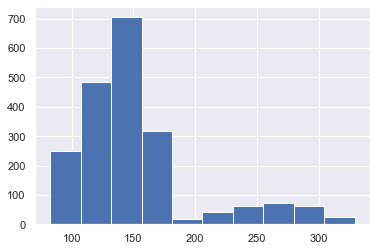

In [14]:
df['High'].hist()

<AxesSubplot:>

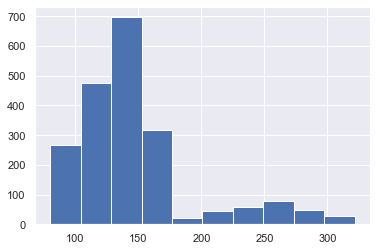

In [15]:
df['Low'].hist()

<AxesSubplot:>

<Figure size 2160x720 with 0 Axes>

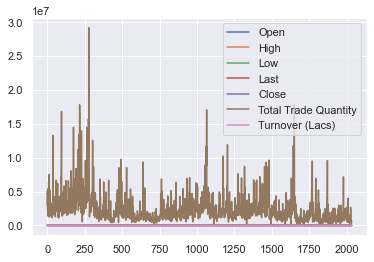

In [16]:
plt.figure(figsize=(30,10))
df.plot()

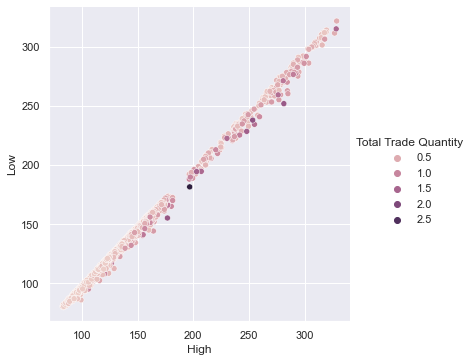

In [19]:
sns.relplot(x='High', y='Low', data=df, hue='Total Trade Quantity')
plt.show()

# Training Dataset

In [22]:
import math

data = df.filter(['Close'])
dataset = df.values
training_data_len = math.ceil(len(df)*8)
print(training_data_len)

16280


In [23]:
dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [25]:
data_set = df.iloc[:, 0:5]
data_set

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [26]:
training_set = data_set.iloc[:,1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

# Scalling Data set

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

data_training_scaled = scaler.fit_transform(training_set)

In [29]:
features_set = []
labels = []
for i in range(60,586):
    features_set.append(data_training_scaled[i-60:i,0])
    labels.append(data_training_scaled[i,0])

In [30]:
features_set, labels = np.array(features_set), np.array(labels)

In [35]:
features_set = np.reshape(features_set, (features_set.shape[0],features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

# Building LSTM

In [38]:
import tensorflow as tf


In [39]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [40]:
model = Sequential()

In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [42]:
model.fit(features_set, labels, epochs=50, batch_size = 20)

Epoch 1/50
27/27 [==============================] - 0s 740us/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 922us/step - loss: 0.0118
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 960us/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 961us/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 776us/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 960us/step - loss: 0.0118
Epoch 13/50
27/27 [==================

In [44]:
data_testing_complete = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


# Prediction

In [45]:
data_total = pd.concat((data_set['Open'], data_set['Open']), axis=0)

In [46]:
test_input = data_total[len(data_total) - len(data_set) - 60:].values
test_input.shape

(2095,)

In [47]:
test_input = test_input.reshape(-1,1)
test_input = scaler.transform(test_input)

In [50]:
test_features = []
for i in range(60,89):
    test_features.append(test_input[i-60:i, 0])

In [51]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape

(29, 60, 1)

In [52]:
predictions = model.predict(test_features)

In [53]:
predictions

array([[[0.20600162],
        [0.21654502],
        [0.21654502],
        ...,
        [0.1650446 ],
        [0.15896188],
        [0.16626115]],

       [[0.21654502],
        [0.21654502],
        [0.2175588 ],
        ...,
        [0.15896188],
        [0.16626115],
        [0.6202352 ]],

       [[0.21654502],
        [0.2175588 ],
        [0.19870235],
        ...,
        [0.16626115],
        [0.6202352 ],
        [0.6222628 ]],

       ...,

       [[0.17092457],
        [0.16788322],
        [0.17477697],
        ...,
        [0.62206   ],
        [0.6455799 ],
        [0.67234385]],

       [[0.16788322],
        [0.17477697],
        [0.16443634],
        ...,
        [0.6455799 ],
        [0.67234385],
        [0.6605839 ]],

       [[0.17477697],
        [0.16443634],
        [0.14557989],
        ...,
        [0.67234385],
        [0.6605839 ],
        [0.64760745]]], dtype=float32)

In [54]:
x_train = data_set[0:1256]
y_train = data_set[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [55]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


In [66]:
y_train

,Date,Open,High,Low,Last
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
5,2018-09-21,235.00,237.00,227.95,233.75
...,...,...,...,...,...
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20
1255,2013-08-29,137.00,140.40,137.00,137.10


In [56]:
np.random.seed(1)

In [57]:
np.random.randn(3,3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [58]:
# drawing a single number from the normal distribution
np.random.normal(1)

0.7506296245225899

In [59]:
# 5 n0. from nd
np.random.normal(5)

6.4621079370449745

In [60]:
np.random.seed(42)
np.random.normal(size = 1000, scale = 100).std()

97.87262077473541

# Plotting Graph

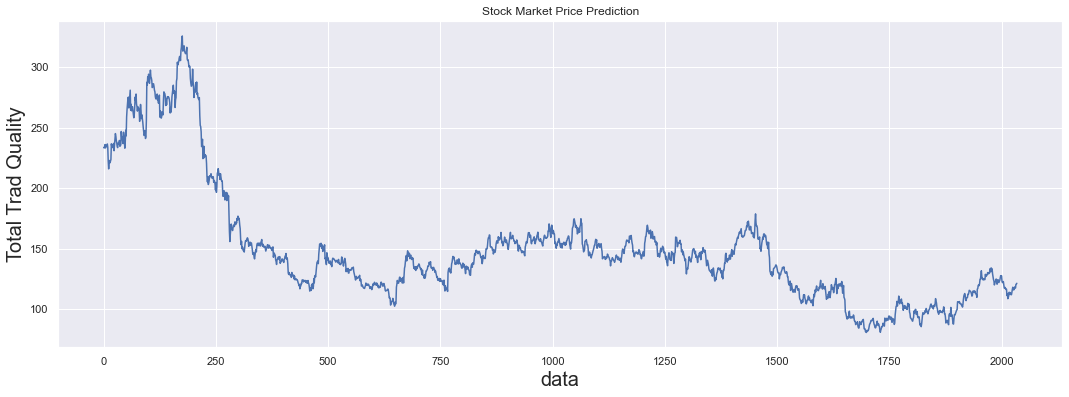

In [61]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('data', fontsize = 20)
plt.ylabel('Total Trad Quality', fontsize = 20)
plt.show()

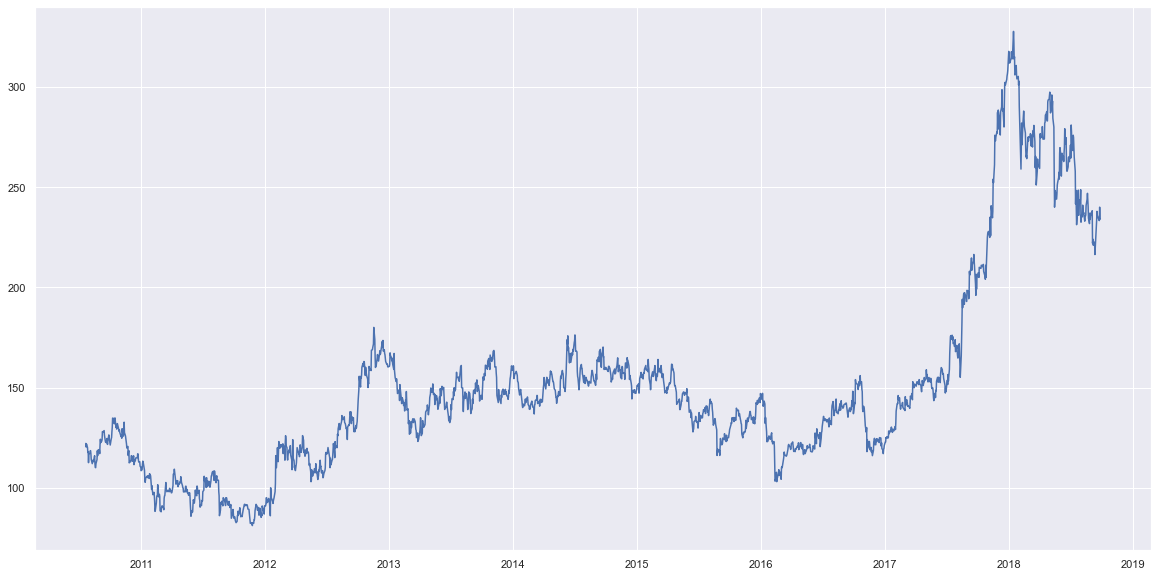

In [63]:
# Analyze the closing prices
data_set["Date"] = pd.to_datetime(data_set.Date)
data_set.index = data_set['Date']

plt.figure(figsize=(20,10))
plt.plot(data_set['Open'], label = 'ClosePriceHist')

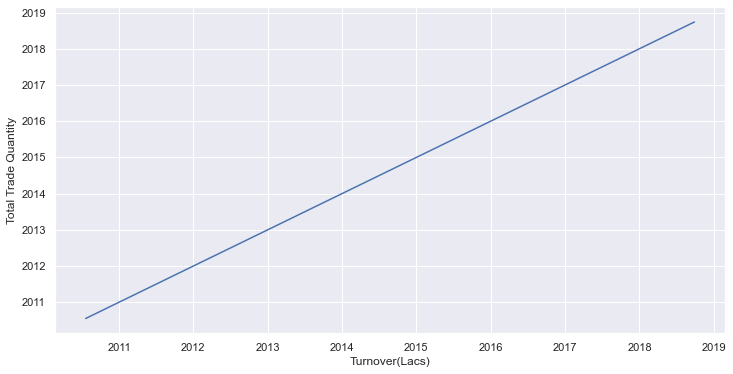

In [64]:
plt.figure(figsize=(12,6))
plt.plot(data_set['Date'])
plt.xlabel('Turnover(Lacs)')
plt.ylabel('Total Trade Quantity')
plt.show()

In [65]:
sns.relplot(x = 'Open', y = 'Close', data = data_set, kind = 'line', hue = 'month')
plt.show()

<bound method DataFrame.info of                  Date    Open    High     Low    Last
Date                                                 
2018-09-28 2018-09-28  234.05  235.95  230.20  233.50
2018-09-27 2018-09-27  234.55  236.80  231.10  233.80
2018-09-26 2018-09-26  240.00  240.00  232.50  235.00
2018-09-25 2018-09-25  233.30  236.75  232.00  236.25
2018-09-24 2018-09-24  233.55  239.20  230.75  234.00
...               ...     ...     ...     ...     ...
2010-07-27 2010-07-27  117.60  119.50  112.00  118.80
2010-07-26 2010-07-26  120.10  121.00  117.10  117.10
2010-07-23 2010-07-23  121.80  121.95  120.25  120.35
2010-07-22 2010-07-22  120.30  122.00  120.25  120.75
2010-07-21 2010-07-21  122.10  123.00  121.05  121.10

[2035 rows x 5 columns]>

In [ ]:
print()